Find best outer ring width so that the propagation constant matches at 1550nm

In [32]:
import numpy as np
np.zeros((1,2),dtype=np.complex64)


array([[0.+0.j, 0.+0.j]], dtype=complex64)

In [33]:
filename_uncoupled = "results/beta_uncoupled.txt"
with open(filename_uncoupled,'w') as f:
    beta_str='123'
    f.write(beta_str)
    f.write(beta_str)


In [18]:
import numpy as np
import matplotlib.pyplot as plt
def Plot_curve(X,Y_arr,Y_legends,
                   X_label,Y_label,
                   dpi=150):

        #Plot parameters
        fonttype = "Helvetica"
        fontsize = 10
        grid_linewidth = 0.8
        plot_linewidth = 0.5
        colors = ['tab:blue', 'tab:orange', 'tab:red', 'tab:green']
        plt.figure(figsize=(4,3))
        for idx in range(np.shape(Y_arr)[1]):
            plt.plot(X,Y_arr[:,idx],label=Y_legends[idx],
                     color=colors[idx], marker='o',
                     linestyle='-', linewidth=plot_linewidth)
        plt.yticks(fontproperties = fonttype, size = fontsize)
        plt.xticks(fontproperties = fonttype, size = fontsize)
        plt.rcParams["font.family"] = fonttype
        plt.rcParams.update({'font.size': fontsize})
        plt.ylabel(Y_label, fontdict={'family' : fonttype, 'size' : fontsize})
        plt.xlabel(X_label, fontdict={'family' : fonttype, 'size' : fontsize})
        plt.legend()
        plt.grid(linewidth=grid_linewidth, alpha=0.3)
        savename = "./results/"+str(Y_label)+".png"
        plt.savefig(savename,dpi=dpi)
        plt.tight_layout()
        plt.show()

In [19]:
filename = 'Scanning_Lx_from2_4to2_5um.txt'
data = np.loadtxt(filename,delimiter=',',dtype=float,skiprows=1)
Lx = data[:,0]
Lx

array([2.4 , 2.41, 2.42, 2.43, 2.44, 2.45, 2.46, 2.47, 2.48, 2.49, 2.5 ])

coefficients: [  40.3985748  5934.04682505]


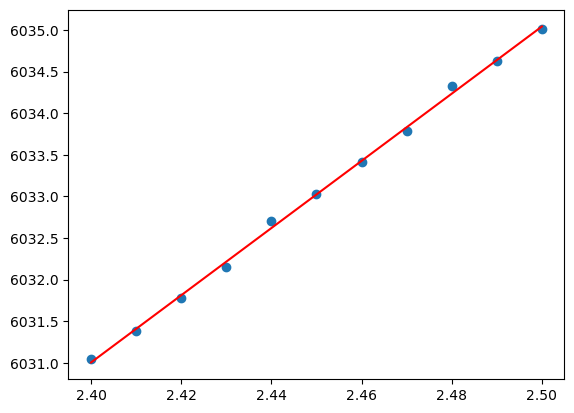

[  40.3985748  5934.04682505]


In [20]:
n_eff = data[:,1]

# 使用polyfit进行线性拟合，deg=1表示线性拟合
coefficients = np.polyfit(Lx, n_eff, 1)

# 使用poly1d生成多项式对象
polynomial = np.poly1d(coefficients)

# 打印拟合得到的系数
print("coefficients:", coefficients)

# 使用拟合得到的模型进行预测
r_fit = np.linspace(Lx[0], Lx[-1], 100000)
n_fit = polynomial(r_fit)

# 绘制原始数据和拟合曲线
plt.scatter(Lx, n_eff)
plt.plot(r_fit, n_fit, color='red')
plt.show()
print(coefficients)


In [21]:
import numpy as np
from scipy.linalg import lstsq

# 定义矩阵 A 和向量 b
Lx_expanded = np.c_[np.ones((np.shape(Lx)[0],1)),Lx]

# 使用 lstsq 求解最小二乘问题
coefficients, residuals, rank, s = lstsq(Lx_expanded, n_eff)

# 输出结果
print("最小二乘解 x:", coefficients)
print("残差平方和:", residuals)
print("矩阵 A 的秩:", rank)
print("奇异值:", s)

最小二乘解 x: [5934.04682505   40.3985748 ]
残差平方和: 0.028067721552593974
矩阵 A 的秩: 2
奇异值: [8.77706838 0.03963175]


In [22]:
def func(x,coefficients):
    a=coefficients[1]
    b=coefficients[0]
    return a*x+b

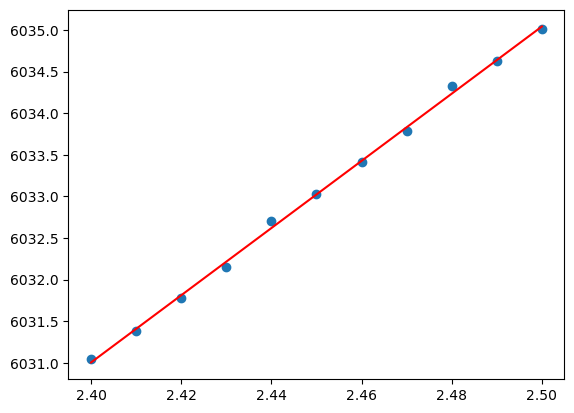

In [23]:
r_fit = np.linspace(Lx[0], Lx[-1], 100000)
n_fit = func(r_fit,coefficients)

plt.scatter(Lx, n_eff)
plt.plot(r_fit, n_fit, color='red')
plt.show()


In [24]:
def find_best_value(x_fit,y_fit,goal):
    y_fit = y_fit - goal
    res = np.array([])
    found = False
    idx = -1
    for i in range(len(y_fit)-1):
        if found:
            idx = i
            found = False
            continue
        if y_fit[i] * y_fit[i+1] <= 0:
            found = True
            if y_fit[i] * y_fit[i+1] < 0:
                res = np.append(res,(x_fit[i]+x_fit[i+1])/2)
            elif y_fit[i] == 0:
                res = np.append(res,x_fit[i])
            else:
                res = np.append(res,x_fit[i+1])
    return res,idx

Best_Lx,idx = find_best_value(r_fit, n_fit,6032.750406328104)
n_fit[idx]


np.float64(6032.750418013064)

In [25]:
Best_Lx

array([2.44324393])

In [26]:
Best_Lx/2 + 1009

array([1010.22162197])

In [27]:
filename = 'Scanning_Lx_for_given_gap.txt'
data = np.loadtxt(filename,delimiter=',',dtype=float,skiprows=1)
wavl = data[:,0]
wavl

array([7.5, 7.6, 7.7, 7.8, 7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5])

In [28]:
filename = '../FDE/results/dispersion_ring_resonator.txt'
data_ring = np.loadtxt(filename,delimiter=',',dtype=float,skiprows=1)
filename = '../FDE/results/dispersion_bus_waveguide.txt'
data_bus = np.loadtxt(filename,delimiter=',',dtype=float,skiprows=1)
wavl = data_bus[:,0]
wavl

array([1.50e-06, 1.51e-06, 1.52e-06, 1.53e-06, 1.54e-06, 1.55e-06,
       1.56e-06, 1.57e-06, 1.58e-06, 1.59e-06, 1.60e-06])

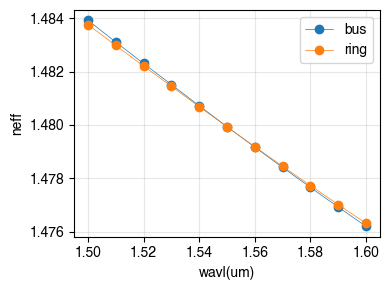

In [29]:
Plot_curve(wavl*1e6,
        np.c_[data_bus[:,1],data_ring[:,1]],
        ["bus","ring"],
        "wavl(um)","neff")

In [30]:
np.array([[1,2]])*np.array([[1,2]])

array([[1, 4]])

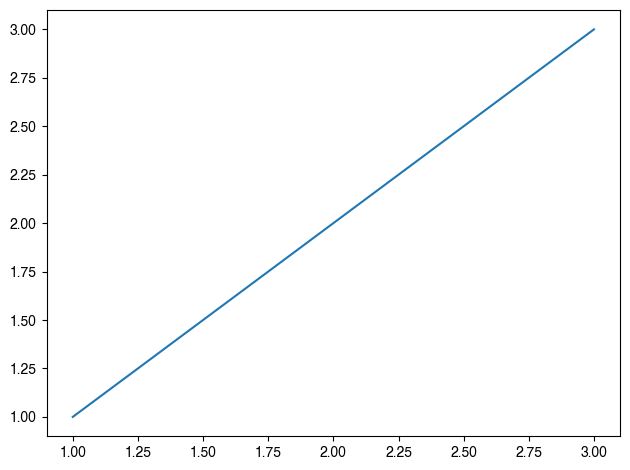

In [31]:
plt.plot([1,2,3],[1,2,3])
Y_label = "beta_ang(rad\\rad)"
savename = "results/"+str(Y_label)+".png"
plt.savefig(savename,dpi=100)
plt.tight_layout()
plt.show()